## **EUR.USD Exchange Rate Visual**

**Purpose:** Provide a simple EUR.USD exchange rate visual:
- [Financial Crisis Example](#Financial-Crisis-Example)
- [Recent US presidential administrations](#US-Presidencies-Example)
 
Please note: this is also data science practice using python, various libraries, github and jupytr notebook. Thank you to the Dataquest crew.

**Data:**
The dataset we'll use describes Euro daily exchange rates between 1999 and April of 2024. 
The euro (symbolized with €) is the official currency in most of the countries of the European Union.

**Source:**
Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — I downloaded it in July of 2024.

**Euro History:**
It wasn't until 1999 that the euro really began its journey when 11 countries (Austria, Belgium, Finland, France, Germany, Ireland, Italy, Luxembourg, the Netherlands, Portugal and Spain) fixed their exchange rates and created a new currency with monetary policy passed to the European Central Bank. 
Today euro is 20+ years old.


### Load in data and explore it

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# load in data
exchange_rates = pd.read_csv('euro-daily-hist_1999_202404.csv')

In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

We can see there are 6,535 rows and 41 columns. There are some missing null values. We will focus on the EUR to USD exchange rate and do some data clean up.

### Data clean up and prep for analysis

In [3]:
# Rename columns for columns of interest to our analysis
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

# Convert the newly created time variable to a datetime data type
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sort the values by time
exchange_rates.sort_values('Time', inplace=True)

# reset_index method is used to reset the index of the pandas Dataframe
# the drop=true parameter is used to prevent the old index from being added as a column
# the inplace=true parameter means that the operation will be performed in place, i.e. it will modify the original dataframe
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
# Create a copy of the dataset to work with and preserve the old one just in case
euro_to_dollar = exchange_rates.copy()[['Time', 'US_dollar']]

In [5]:
# Look at a frequency count by using the value_counts pandas method
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.0808     8
1.1215     8
1.0867     8
          ..
1.4579     1
1.4607     1
1.4639     1
1.4651     1
1.086      1
Name: count, Length: 3785, dtype: int64

In [6]:
# In the above frequency table, we see there are 62 blanks. Let's drop these blanks by creating a boolean mask to filter out the blanks
# Then update the pandas dataset with the filter
# Then perform the .shape method to get a fill for the cleaned up euro_to_dollar dataframe to confirm we removed the blanks or "-"

euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_dollar.shape

(6473, 2)

In [7]:
# Convert the US_Dollar column to a float datatype for analysis
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

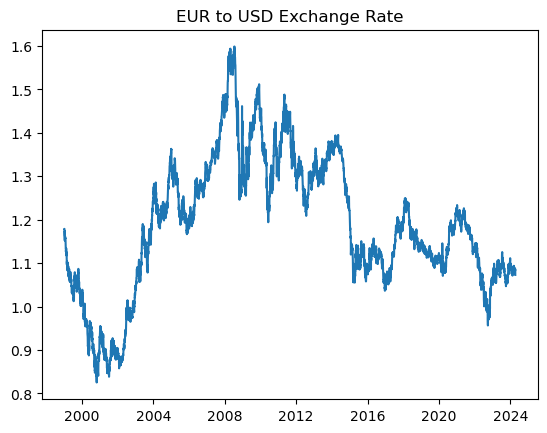

In [8]:
# Matplotlib inline helps JupytrNotebook render matplot lib plots directly within the notebook
%matplotlib inline

# Create 
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('EUR to USD Exchange Rate')
plt.show()



### Rolling mean or Moving Average synopsis
If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

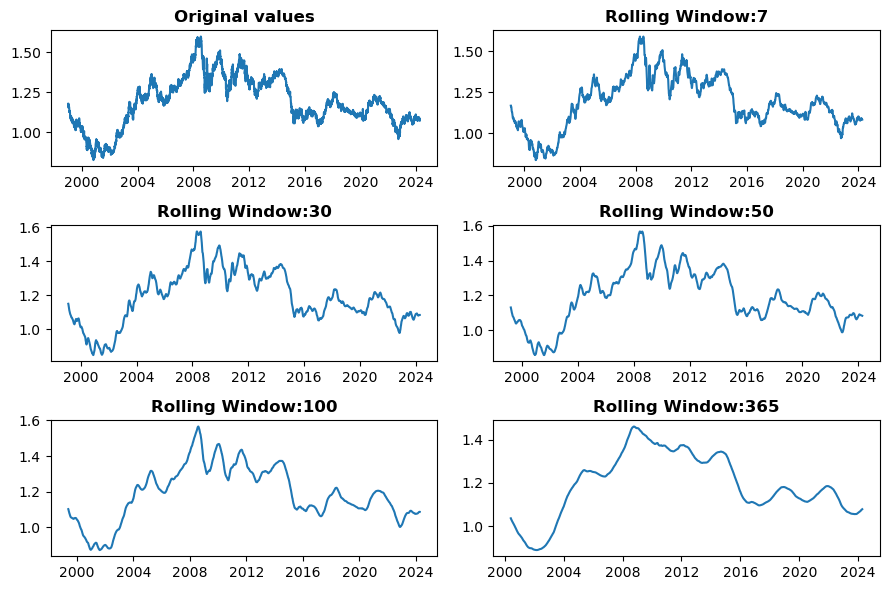

In [9]:
# Create a 9 inches wide by 6 inches tall figure.
plt.figure(figsize=(9,6))

# Create a subplot 
# A subplot is a smaller plot area within a larger figure, and it's often used to display multiple plots or charts within a single figure.
# plt.subplot parameters are nrows, ncolumns, index (the index of the subplot within the grid you created by nrows ncolumns)
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

# The zip function allows us to iterate over two lists
# zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]) creates an iterator that pairs up the elements from the two lists.
# The for loop iterates over this iterator, assigning the values from each pair to the variables i and rolling_mean.
# So, on each iteration, i will take on the values 2, 3, 4, 5, and 6, and rolling_mean will take on the values 7, 30, 50, 100, and 365, respectively.
#This is a convenient way to iterate over two lists in parallel, without having to use indexing or other more cumbersome approaches
for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [10]:
# Create a 30 day rolling mean or moving average and display some of the raw output in the notebook cell
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar


,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6530,2024-04-05,1.0841,1.085630
6531,2024-04-08,1.0823,1.085560
6532,2024-04-09,1.0867,1.085670
6533,2024-04-10,1.0860,1.085697


We can see the first 29 rows (the row index starts at 0 not 1) are null because there are no historical values for the first input. The rolling mean calculation shows up at the 30th row or row 29 based on the index. 
We can see that demonstrated below:
-  by using the `iloc` pandas method which
allows you to access and manipulate rows and columns of a DataFrame by their integar position.
iloc stands for "integar location" and it's used to access specific rows and columns based on their numerical index.

In [11]:
euro_to_dollar.iloc[28:31]

,Time,US_dollar,rolling_mean
28,1999-02-11,1.1312,NaN
29,1999-02-12,1.1244,1.150667
30,1999-02-15,1.1238,1.148830


### **Coming up with an idea for a interesting data visual**
- How the EUR-USD exhange rate changed during the 2007-2008 financial crisis.
- How the EUR-USD exchange rate changed under the last 4 presidents.

#### **Financial Crisis Example**


In [12]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]

financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

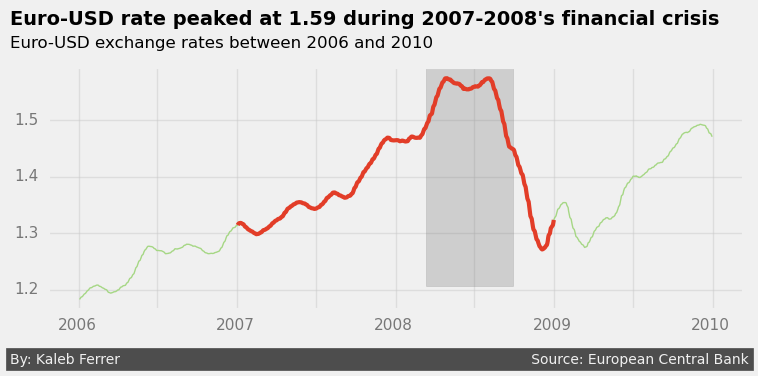

In [13]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')


### Adding separate tick labels
ax.set_xticklabels([])

 ### Highlihting the peak of the crisis
ax.axvspan(xmin=13950.0, xmax=14150.0, ymin=0.1,
           alpha=0.3, color='grey')  

### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13100.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13000.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(12990.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(12990.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(12990.0, 1.07, 'By: Kaleb Ferrer' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

### **US Presidencies Example**

In [14]:
bush_obama_trump_biden = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2025)]

bush = bush_obama_trump_biden.copy(
       )[bush_obama_trump_biden['Time'].dt.year < 2009]

obama = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year >= 2009) & (bush_obama_trump_biden['Time'].dt.year < 2017)]

trump = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year >= 2017) & (bush_obama_trump_biden['Time'].dt.year < 2021)]

biden = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year >= 2021) & (bush_obama_trump_biden['Time'].dt.year < 2025)]

Below you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots:

- We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty.)
- We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty.)
- The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.



/var/folders/n0/xptdsjvx3qlb85h3vwjwt9h80000gn/T/ipykernel_55190/844074318.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '01', '', '03', '', '05', '',
/var/folders/n0/xptdsjvx3qlb85h3vwjwt9h80000gn/T/ipykernel_55190/844074318.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '09', '', '11', '', '13', '',
/var/folders/n0/xptdsjvx3qlb85h3vwjwt9h80000gn/T/ipykernel_55190/844074318.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['17', '', '18', '', '19', '',


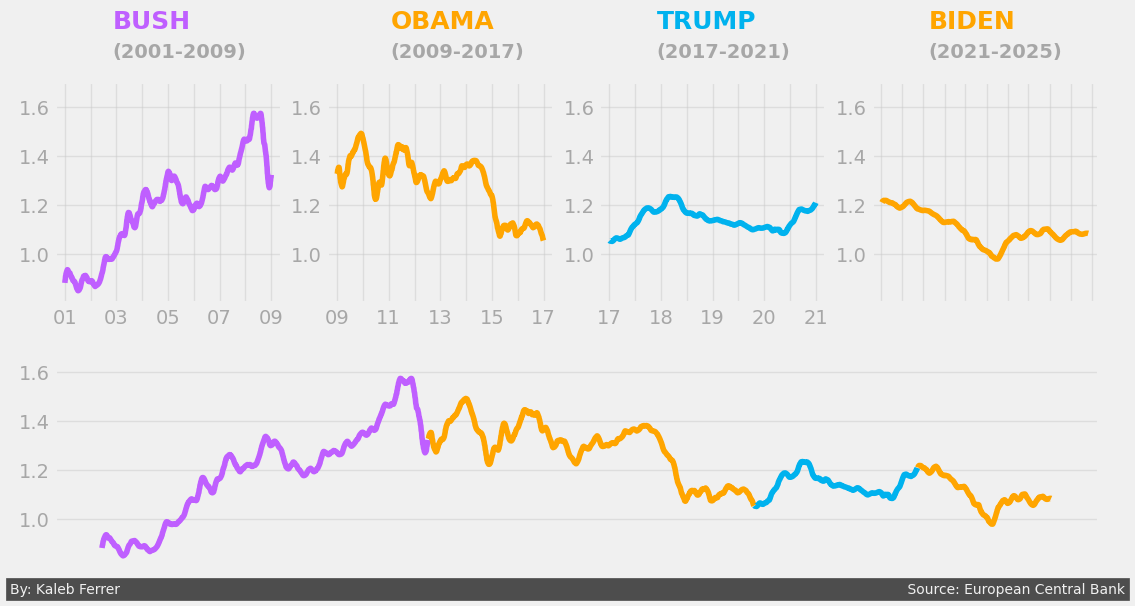

In [16]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '01', '', '03', '', '05', '',
                     '07', '', '09'],
                   alpha=0.3)
ax1.text(12000.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(12000.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)

### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '09', '', '11', '', '13', '',
                     '15', '', '17'],
                   alpha=0.3)
ax2.text(15000.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(15000.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['17', '', '18', '', '19', '',
                     '20', '', '21'],
                   alpha=0.3)
ax3.text(17500.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(17500.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Biden
ax4.plot(biden['Time'], biden['rolling_mean'],
        color='#ffa500')
ax4.set_xticklabels([],
                   alpha=0.3)
ax4.text(18900.0, 1.92, 'BIDEN', fontsize=18, weight='bold',
        color='#ffa500')
ax4.text(18900.0, 1.8, '(2021-2025)', weight='bold',
         alpha=0.3)


### Ax5: Bush-Obama-Trump-Biden
ax5.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax5.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax5.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax5.plot(biden['Time'], biden['rolling_mean'],
        color='#ffa500')
ax5.grid(alpha=0.5)
ax5.set_xticks([])

### Adding a signature
ax.text(10500.0, 0.7, 'By: Kaleb Ferrer' + ' '*180 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

plt.show()